In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [8]:
AR2_Base = []
MAE_Base = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    pred = lasso_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Base.append(mae)    

In [9]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Base

,AR2_Base,MAE_Base
0,0.901874,13868.371424
1,0.857328,14614.531508
2,0.867419,14555.501774
3,0.914986,13985.764532
4,0.788610,14897.708055
...,...,...
95,0.904494,14218.512637
96,0.850400,14469.145918
97,0.916918,13537.202422
98,0.885929,15165.781314


In [10]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [11]:
base_drop1.shape

(2579, 300)

In [12]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [13]:
len(y2)

2579

In [14]:
X2.shape

(2579, 299)

In [15]:
X2.shape[1]

299

In [18]:
AR2_Drop1 = []
MAE_Drop1 = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    pred = lasso_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [19]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.914215,14420.958359
1,0.900376,14761.403818
2,0.903634,13977.604613
3,0.919274,13372.394085
4,0.899017,14613.696243
...,...,...
95,0.922946,13963.753443
96,0.919089,13015.297781
97,0.913042,14288.709495
98,0.913066,14030.113859


In [20]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')

In [21]:
base_drop_IF.shape

(2567, 299)

In [22]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [23]:
AR2_DropIF = []
MAE_DropIF = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    pred = lasso_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [24]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.924447,12687.714515
1,0.904134,14890.341096
2,0.926487,13020.475103
3,0.900886,13634.444821
4,0.890103,14749.647349
...,...,...
95,0.906774,14537.756483
96,0.902099,13746.098425
97,0.906401,13524.768809
98,0.936427,12936.901402


In [25]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.901874,13868.371424,0.914215,14420.958359,0.924447,12687.714515
1,0.857328,14614.531508,0.900376,14761.403818,0.904134,14890.341096
2,0.867419,14555.501774,0.903634,13977.604613,0.926487,13020.475103
3,0.914986,13985.764532,0.919274,13372.394085,0.900886,13634.444821
4,0.788610,14897.708055,0.899017,14613.696243,0.890103,14749.647349
...,...,...,...,...,...,...
95,0.904494,14218.512637,0.922946,13963.753443,0.906774,14537.756483
96,0.850400,14469.145918,0.919089,13015.297781,0.902099,13746.098425
97,0.916918,13537.202422,0.913042,14288.709495,0.906401,13524.768809
98,0.885929,15165.781314,0.913066,14030.113859,0.936427,12936.901402


In [26]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.888949,14305.523832,0.910952,14028.481063,0.915792,13653.864220
std,0.028562,638.430031,0.008180,549.928125,0.009245,530.653962
min,0.788610,12745.254017,0.892161,12618.711680,0.890103,12165.397074
25%,0.866084,13958.969416,0.904424,13600.384873,0.910020,13277.225674
50%,0.900060,14262.294739,0.912782,14041.031169,0.916019,13626.832115
75%,0.910457,14725.200651,0.915816,14413.121250,0.921963,13984.000457
max,0.924920,16876.482620,0.928358,15285.199943,0.936427,15210.303742


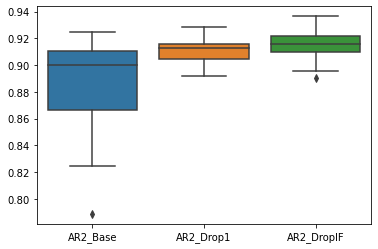

In [27]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

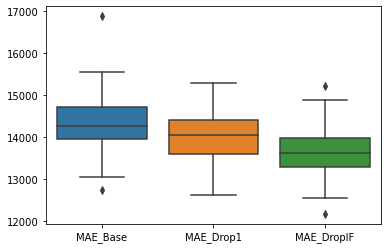

In [28]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);